In [1]:
import pandas as pd
import datetime
train=pd.read_csv('/Users/sophengsok/Documents/DataScience/1 Capstone Project/Assigment/ClimateTrain.csv')
test=pd.read_csv('/Users/sophengsok/Documents/DataScience/1 Capstone Project/Assigment/ClimateTest.csv')

In [2]:
train
train.set_index("date", inplace=True)
train.index = pd.to_datetime(train.index)

In [3]:
train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [4]:
test
test.set_index("date", inplace=True)
test.index = pd.to_datetime(test.index)

In [5]:
test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [6]:
train.isna().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [7]:
test.isna().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [8]:
df=pd.concat([train,test])

In [9]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [10]:
df.sort_index(axis=0, inplace=True)

In [11]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


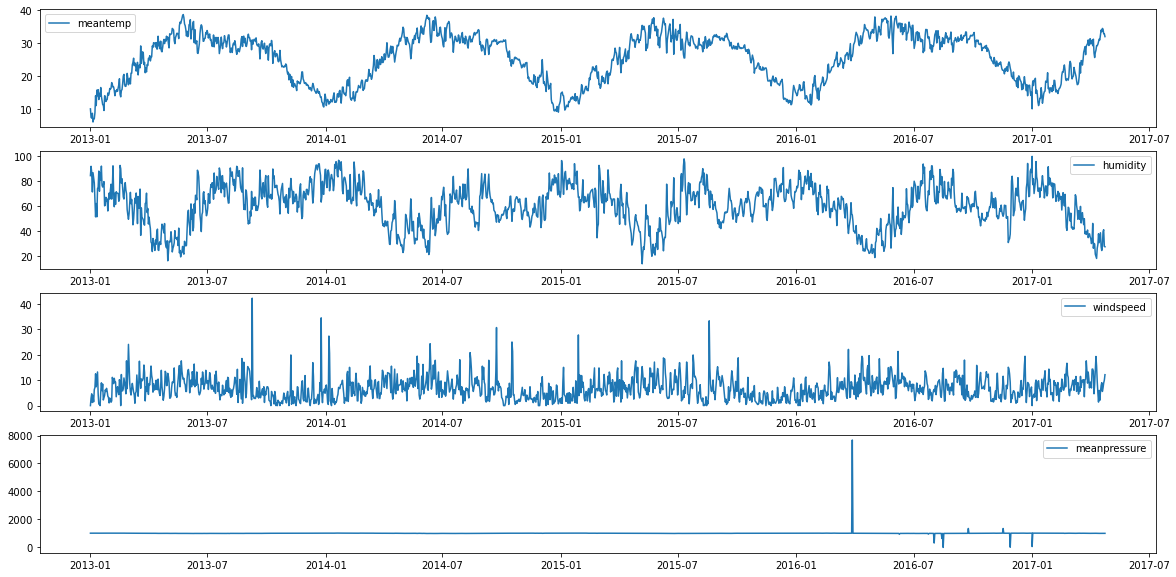

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df['meantemp'], label='meantemp')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(df['humidity'], label='humidity')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(df['wind_speed'], label='windspeed')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(df['meanpressure'], label='meanpressure')
plt.legend(loc='best')
plt.show(block=False)

In [13]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['meantemp'],autolag='AIC')

(-2.3791899484520918,
 0.14769623489792388,
 10,
 1565,
 {'1%': -3.4345353407734733,
  '5%': -2.86338857621683,
  '10%': -2.567754150088293},
 5876.969927388109)

In [14]:
adfuller(df['humidity'],autolag='AIC')

(-3.628942159385871,
 0.005231221485558129,
 15,
 1560,
 {'1%': -3.4345487774977768,
  '5%': -2.8633945067663817,
  '10%': -2.5677573081032214},
 10733.782946525798)

In [15]:
adfuller(df['wind_speed'],autolag='AIC')

(-4.01322099000784,
 0.0013428427295095503,
 24,
 1551,
 {'1%': -3.434573182279212,
  '5%': -2.863405278205157,
  '10%': -2.567763043900464},
 8709.283841093113)

In [16]:
adfuller(df['meanpressure'],autolag='AIC')

(-39.54736593013774,
 0.0,
 0,
 1575,
 {'1%': -3.434508723681996,
  '5%': -2.863376828187341,
  '10%': -2.567747894280675},
 20454.769424243208)

As data is STATIONARY we will process MODELING by using different techniques to find out the best model

In [17]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['meantemp'],order=(3,0,2))
result_temp=model.fit()
result_temp.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramet

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1576
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -2994.373
Date:                Tue, 28 Feb 2023   AIC                           6002.747
Time:                        16:32:58   BIC                           6040.285
Sample:                             0   HQIC                          6016.696
                               - 1576                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7484      3.180      7.783      0.000      18.516      30.981
ar.L1          0.5892      0.050     11.813      0.000       0.491       0.687
ar.L2          0.9874      0.018     56.157      0.000       0.953       1.022
ar.L3         -0.5805      0.047    -12.226      0.000      -0.674      -0.487
ma.L1          0.1859      0.042      4.459      0.000       0.104       0.268
ma.L2         -0.7923      0.039    -20.265      0.000      -0.869      -0.716
sigma2         2.6116      0.077     33.942      0.000       2.461       2.762
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               215.42
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.42
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
output=result_temp.predict(start='2017-01-01', end='2017-04-23')

In [19]:
output

date
2017-01-01    15.355482
2017-01-01    11.420922
2017-01-02    15.687224
2017-01-03    17.868749
2017-01-04    16.838799
                ...    
2017-04-19    33.200247
2017-04-20    32.859390
2017-04-21    33.831876
2017-04-22    33.672605
2017-04-23    32.797004
Name: predicted_mean, Length: 114, dtype: float64

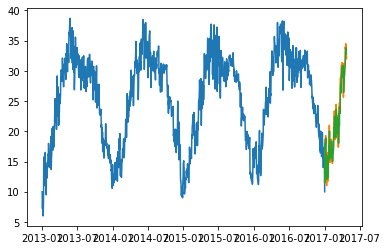

In [20]:
plt.plot(train['meantemp'])
plt.plot(test['meantemp'])
plt.plot(output)

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(test['meantemp'],output))

In [22]:
RMSE

2.279193638745086

In [23]:
model=ARIMA(df['humidity'],order=(3,0,2))
result_hum=model.fit()
result_hum.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramet

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               humidity   No. Observations:                 1576
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -5465.566
Date:                Tue, 28 Feb 2023   AIC                          10945.133
Time:                        16:33:00   BIC                          10982.671
Sample:                             0   HQIC                         10959.083
                               - 1576                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.0466      4.187     14.342      0.000      51.841      68.253
ar.L1          0.6383      0.243      2.623      0.009       0.161       1.115
ar.L2          0.9349      0.394      2.374      0.018       0.163       1.707
ar.L3         -0.5850      0.159     -3.678      0.000      -0.897      -0.273
ma.L1          0.0960      0.239      0.402      0.688      -0.373       0.565
ma.L2         -0.8384      0.212     -3.953      0.000      -1.254      -0.423
sigma2        60.1579      1.704     35.300      0.000      56.818      63.498
===================================================================================
Ljung-Box (L1) (Q):                   2.64   Jarque-Bera (JB):               235.59
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
output=result_hum.predict(start='2017-01-01', end='2017-04-23')

In [25]:
output

date
2017-01-01    82.789339
2017-01-01    92.701954
2017-01-02    83.027241
2017-01-03    76.948460
2017-01-04    80.280035
                ...    
2017-04-19    29.853298
2017-04-20    27.357777
2017-04-21    29.643991
2017-04-22    38.254963
2017-04-23    39.635949
Name: predicted_mean, Length: 114, dtype: float64

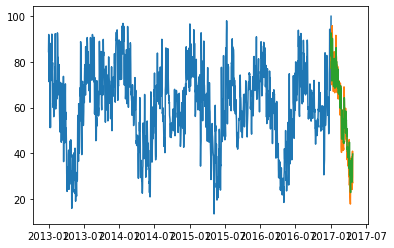

In [26]:
plt.plot(train['humidity'])
plt.plot(test['humidity'])
plt.plot(output)

In [27]:

RMSE=np.sqrt(mean_squared_error(test['humidity'],output))

In [28]:
RMSE

8.540974096064296

In [29]:
model=ARIMA(df['wind_speed'],order=(3,0,2))
result_wind=model.fit()
result_wind.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramet

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             wind_speed   No. Observations:                 1576
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -4409.170
Date:                Tue, 28 Feb 2023   AIC                           8832.340
Time:                        16:33:03   BIC                           8869.879
Sample:                             0   HQIC                          8846.290
                               - 1576                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9132      0.736      9.397      0.000       5.471       8.355
ar.L1          0.3366      0.027     12.387      0.000       0.283       0.390
ar.L2          0.9865      0.017     59.715      0.000       0.954       1.019
ar.L3         -0.3387      0.019    -18.078      0.000      -0.375      -0.302
ma.L1          0.0418      0.021      2.010      0.044       0.001       0.083
ma.L2         -0.9451      0.019    -50.358      0.000      -0.982      -0.908
sigma2        15.7204      0.288     54.620      0.000      15.156      16.284
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              7538.16
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             1.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
output=result_wind.predict(start='2017-01-01', end='2017-04-23')

In [31]:
output

date
2017-01-01    6.886151
2017-01-01    4.259251
2017-01-02    4.994772
2017-01-03    5.133515
2017-01-04    5.324430
                ...   
2017-04-19    8.255652
2017-04-20    8.520620
2017-04-21    7.386860
2017-04-22    7.659874
2017-04-23    8.537319
Name: predicted_mean, Length: 114, dtype: float64

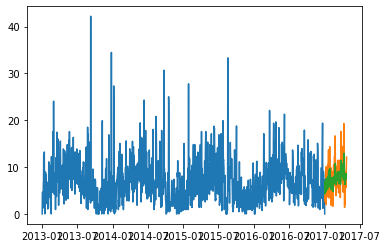

In [32]:
plt.plot(train['wind_speed'])
plt.plot(test['wind_speed'])
plt.plot(output)

In [33]:

RMSE=np.sqrt(mean_squared_error(test['wind_speed'],output))

In [34]:
RMSE

3.59439873624036

In [35]:
RMSE=np.sqrt(mean_squared_error(test['meantemp'],output))

Since Meanpressure has consistently number, we will exclude it.

In [36]:
from pmdarima.arima import auto_arima
model=auto_arima(df['meantemp'],trace=True,error_action='trace',suppress_warnings=True,seasonal=True,m=1, information_criterion='bic')

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : BIC=6035.818, Time=1.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=10771.376, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=6110.513, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=9137.921, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=14781.820, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : BIC=6057.272, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : BIC=6028.568, Time=1.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=6073.930, Time=0.41 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : BIC=6083.070, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : BIC=6035.795, Time=1.59 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : BIC=6077.959, Time=0.50 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : BIC=6041.844, Time=1.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : BIC=6026.203, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=6079.244, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]        

In [37]:
result_temp=model.fit(df['meantemp'])
result_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1576
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -2998.376
Date:                Tue, 28 Feb 2023   AIC                           6004.752
Time:                        16:33:15   BIC                           6026.203
Sample:                             0   HQIC                          6012.724
                               - 1576                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5819      0.045     34.799      0.000       1.493       1.671
ar.L2         -0.5822      0.045    -12.824      0.000      -0.671      -0.493
ma.L1         -0.8038      0.036    -22.363      0.000      -0.874      -0.733
sigma2         2.6216      0.073     35.671      0.000       2.478       2.766
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               237.77
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.43
Prob(H) (two-sided):                  0.57   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
output=pd.DataFrame(result_temp.predict(n_periods=114),index=test.index)
output.columns=['meantemp']

In [39]:
output

,meantemp
date,
2017-01-01,32.104938
2017-01-02,32.157599
2017-01-03,32.179811
2017-01-04,32.184291
2017-01-05,32.178447
...,...
2017-04-20,30.139655
2017-04-21,30.120693
2017-04-22,30.101743


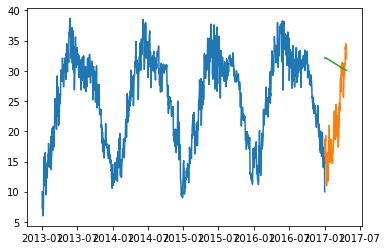

In [40]:
plt.plot(train['meantemp'])
plt.plot(test['meantemp'])
plt.plot(output)

from this we can see that using AUTO_ARIMA is not a good model